# Exploratory Data Analysis (EDA)

### Importing packages

In [112]:
import pandas as pd





### Loading data

In [113]:
df = pd.read_csv("i:\\Projects\\housePricePredictor\\src\\data\\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Analysis

### Observing and getting insights

In [114]:
print(df.shape)

df.columns.to_list()

(545, 13)


['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

#### Insights
- This dataset have 545 Rows and 13 Columns

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [116]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [117]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### Insights
- There are no null values 

In [118]:
df.duplicated().sum()

np.int64(0)

In [119]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [120]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns
print(len(numerical_cols))

for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"{col}: {df[col].unique()}")

6
mainroad: 2 unique values
mainroad: ['yes' 'no']
guestroom: 2 unique values
guestroom: ['no' 'yes']
basement: 2 unique values
basement: ['no' 'yes']
hotwaterheating: 2 unique values
hotwaterheating: ['no' 'yes']
airconditioning: 2 unique values
airconditioning: ['yes' 'no']
prefarea: 2 unique values
prefarea: ['yes' 'no']
furnishingstatus: 3 unique values
furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


#### Insight
- We have total 7 Categorical features & 6 Numerical features
- We have ['yes' 'no'] for all categorical features except for "furnishingstatus". "furnishingstatus" have 3 unique values ['furnished' 'semi-furnished' 'unfurnished']

In [121]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Show number of unique values for each numeric column
for col in numeric_cols:
    print(f"{col}: {df[col].nunique()} unique values")

price: 219 unique values
area: 284 unique values
bedrooms: 6 unique values
bathrooms: 4 unique values
stories: 4 unique values
parking: 4 unique values


In [122]:
df["price"].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

#### Insights
- From this, we can see the data is right-skewed because the mean is greater than the median.

### Visualization

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

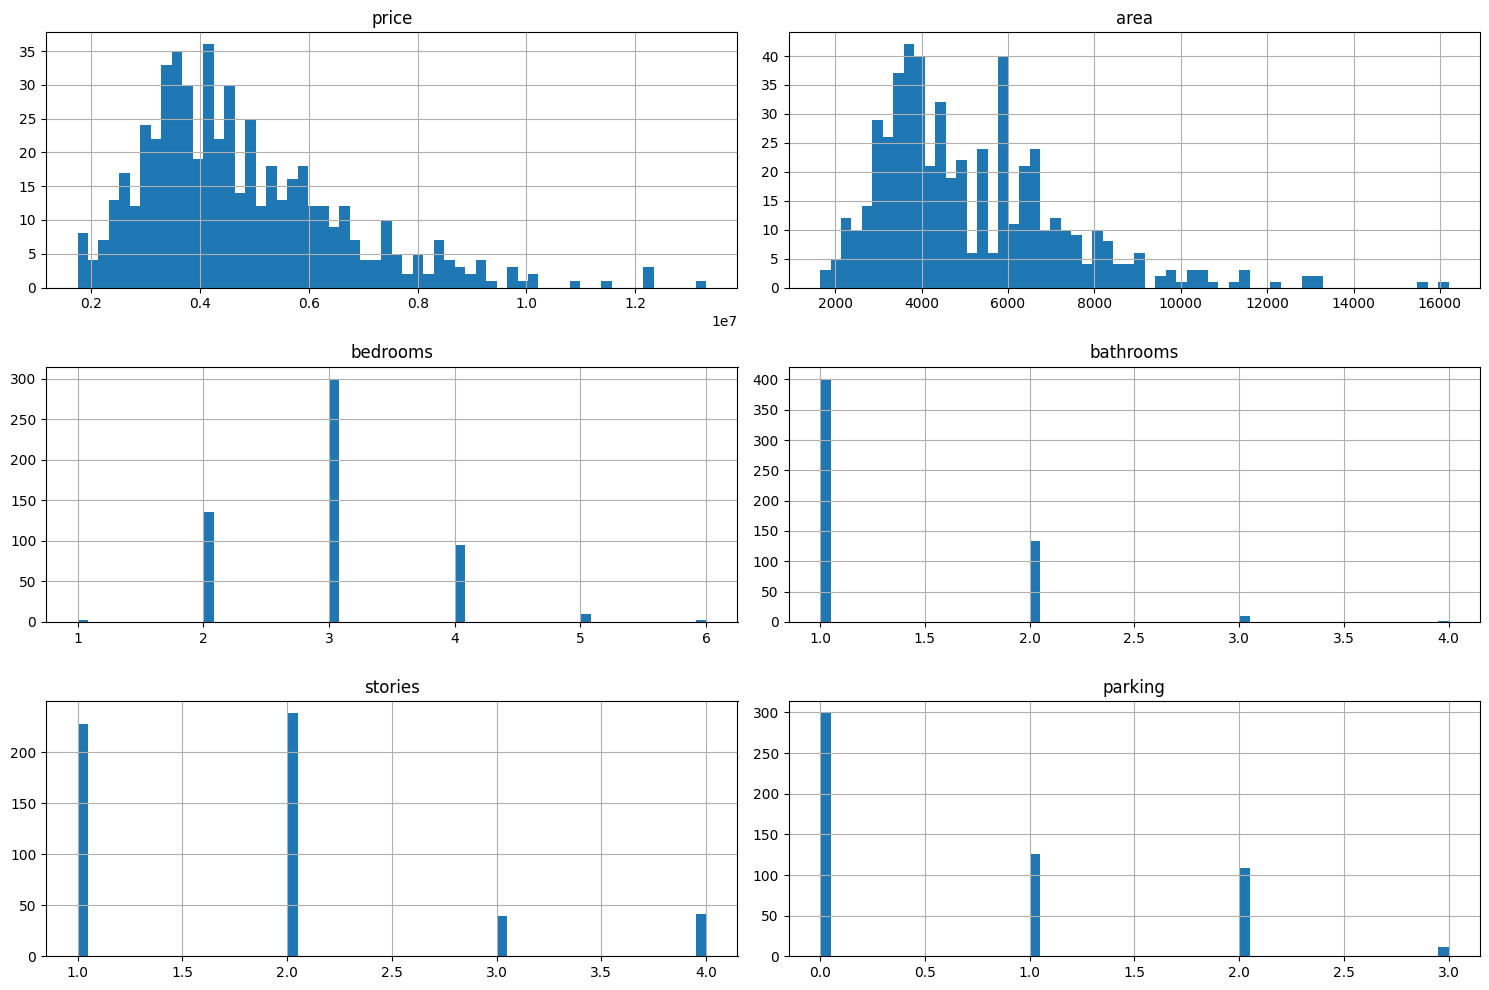

In [124]:
df[numeric_cols].hist(bins=60, figsize=(15, 10))
plt.tight_layout()
plt.show()

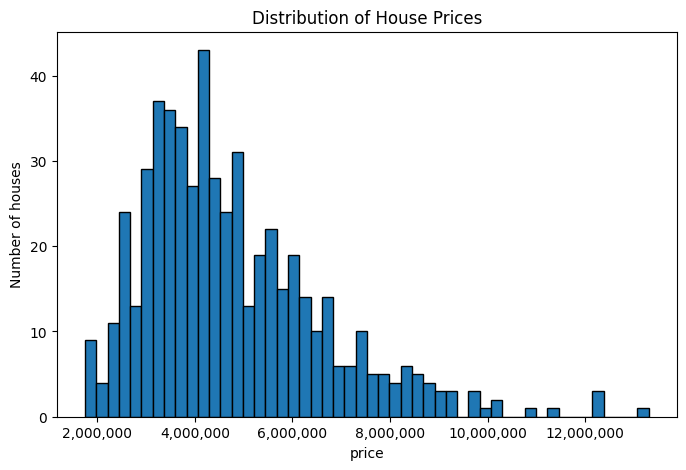

In [125]:
plt.figure(figsize=(8, 5))
plt.hist(df["price"],bins=50,edgecolor='black')
plt.xlabel("price")
plt.ylabel("Number of houses")
plt.title("Distribution of House Prices")
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

#### Insights
- Most house price range falls between 4,000,000 to 5,000,000
- Most house area falls between 3000 to 4000
- Most house have 2 stories
- Most house don't have parking area


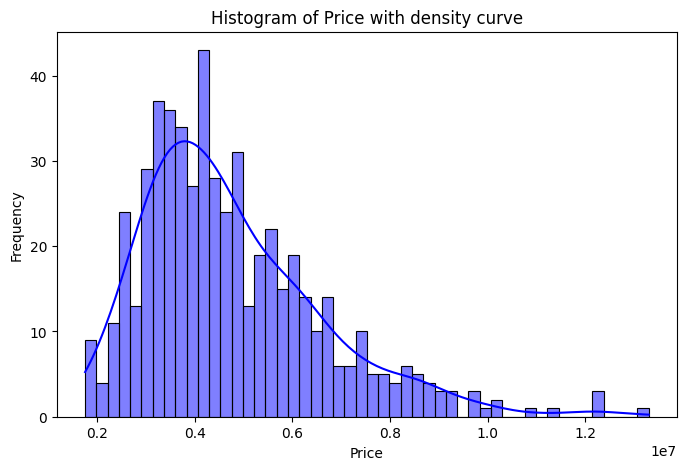

In [126]:
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=50, kde=True, color='blue', edgecolor='black')
plt.title("Histogram of Price with density curve")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

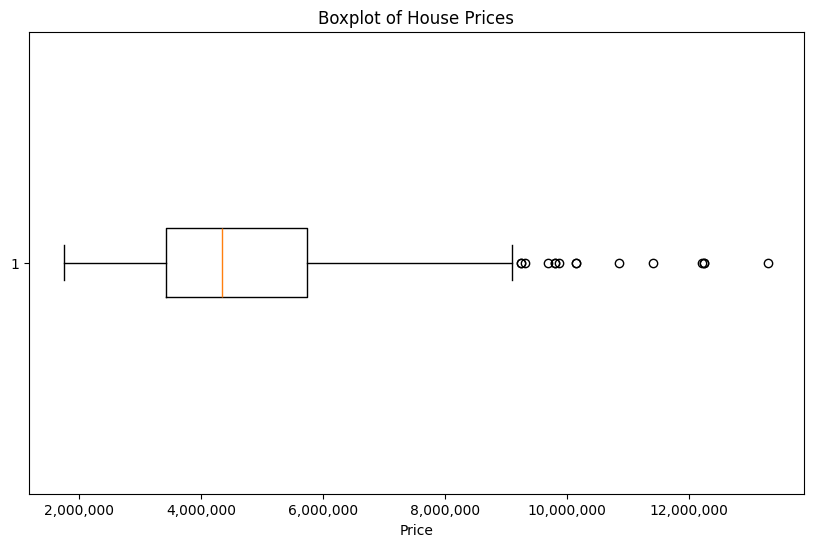

In [127]:
plt.figure(figsize=(10, 6))
# plt.boxplot(x=df["price"])
plt.boxplot(x=df["price"], vert=False)
plt.title("Boxplot of House Prices")
plt.xlabel("Price")
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

### Normalizing the right-skewed values 

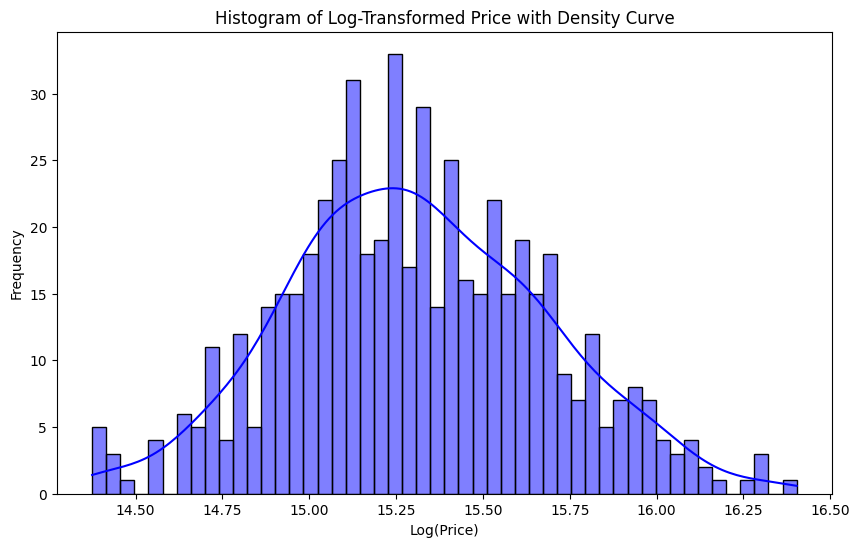

In [128]:
df["price_log"] = np.log(df["price"])

plt.figure(figsize=(10, 6))
sns.histplot(df["price_log"], bins=50, kde=True, color='blue', edgecolor='black')
plt.title("Histogram of Log-Transformed Price with Density Curve")
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")
plt.show()

In [129]:
df["price_log"].describe()

count    545.000000
mean      15.306987
std        0.372165
min       14.375126
25%       15.048071
50%       15.283385
75%       15.562970
max       16.403275
Name: price_log, dtype: float64

#### Insights  
- We see that the standard deviation (std) is much lower than before.  
- A lower standard deviation is generally better for the model to train effectively.  


### Feature Relationships (Correlation with Price)
We need to find which features are most related to price because:

- Not all features equally affect house prices.

- Identifying strong correlations helps focus on useful predictors.

#### Step 1: Correlation Heatmap (numeric features)

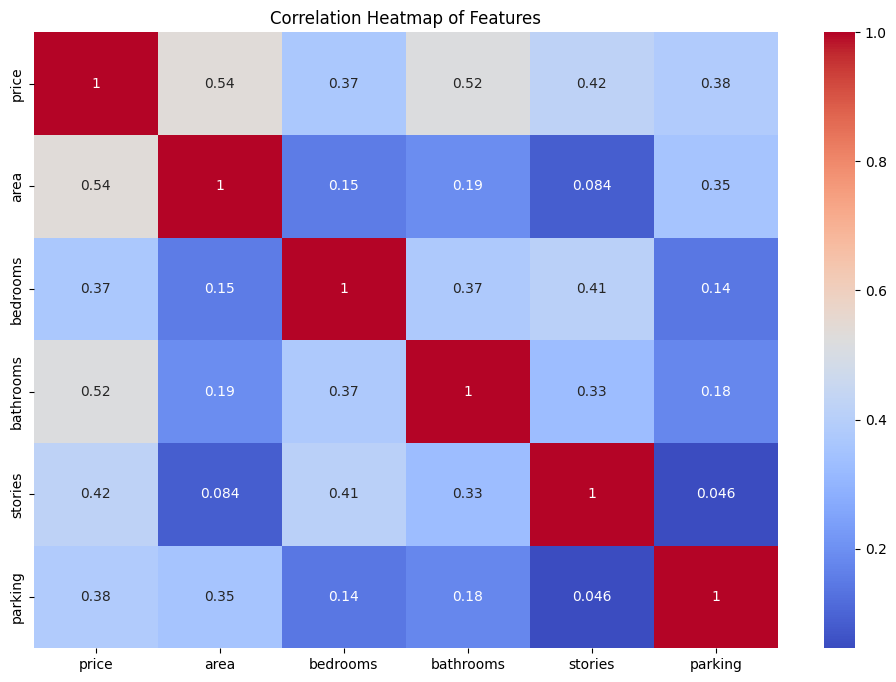

In [130]:
plt.figure(figsize=(12, 8))
corr = df.drop(columns=["price_log"]).select_dtypes(include=['float64', 'int64']).corr()


sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()

<Axes: >

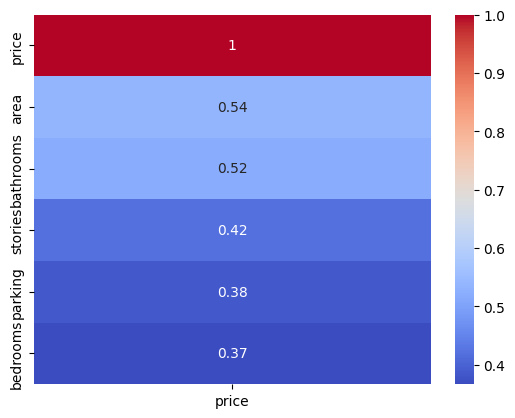

In [131]:
corr_price = corr["price"].sort_values(ascending=False)
sns.heatmap(corr_price.to_frame(), annot=True, cmap='coolwarm')

In [132]:
corr_price

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64

#### Insights
- We see that area is the greatest contributor to price.

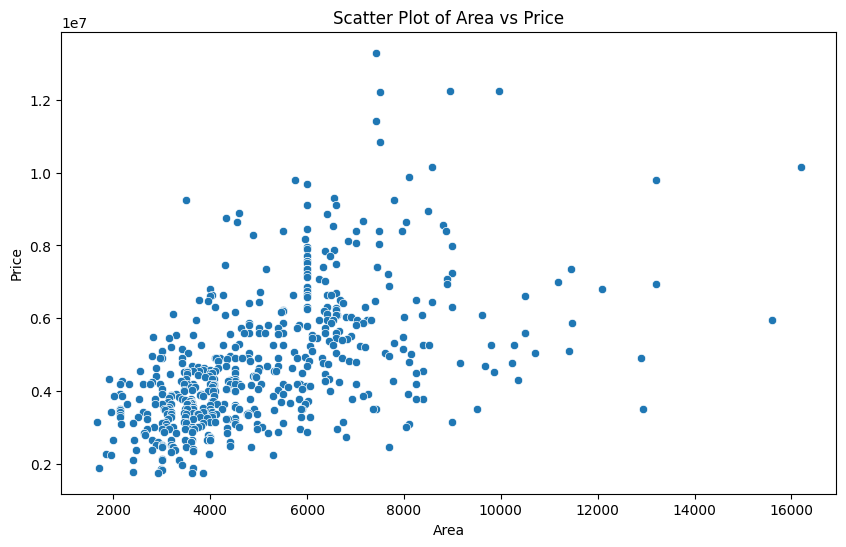

In [133]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['area'], y=df['price'])
plt.title("Scatter Plot of Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

## Saving the updated data

In [135]:
finalDf = df.drop(columns=["price"])

In [137]:
finalDf.to_csv("i:\\Projects\\housePricePredictor\\src\\data\\final_data.csv", index=False)